###### title: 'Data scientists salary'

author: 'Gamaliel Mendoza'

date: 26/May/25

## This notebook performs an analysis of data scientists' salary as of 2024.
* The analysis is based on:
    * Records data from 2020-2022 by [the Hugging face](https://huggingface.co/datasets/hugginglearners/data-science-job-salaries)
    * Data for 2024 data from [Kaggle](https://www.kaggle.com/datasets/adilshamim8/salary-prediction-salary-dataset/data)
* The analysis procedure was:
    * Queries with SQLite3
    * Conversion to DataFrames
    * Statistical analyis:
        * One-way analysis of variance (for the first dataset)
        * Linear regression (for the 2024 dataset)

In [1]:
sol=1
jpl=1
bollyn=bool(sol)
if bollyn == True:
    print('Downloading')
    if jpl == 0:
        !pip install kagglehub huggingface_hub ipython-sql scipy
        print('Downloaded with pip')
    elif jpl ==1:
        softs=["kagglehub","seaborn","huggingface_hub","ipython-sql","scipy"]
        print('Downloading with piplite')
        import piplite
        for s in softs:
            await piplite.install(s)
            print(s, 'installed')
        print('Done')
        
else:
    print('Libraries already downloaded')

Libraries already downloaded


In [2]:
#await piplite.install("pretty_jupyter")
import kagglehub
import warnings
import pandas as pd
import prettytable
prettytable.DEFAULT = 'DEFAULT'
import sqlite3
warnings.simplefilter(action='ignore', category=FutureWarning)
# Download latest version
import pandas as pd
import os
from matplotlib import pyplot as plt

In [3]:
# The two datasets are downloaded with with API resources
path = kagglehub.dataset_download("adilshamim8/salary-prediction-salary-dataset")
fls=os.listdir(path)
df=pd.read_csv(path+'/'+fls[0])
dfTemp = pd.read_csv("hf://datasets/hugginglearners/data-science-job-salaries/ds_salaries.csv")

In [4]:
# Tables and connections are created for the SQL tables
%reload_ext sql
con=sqlite3.connect('KaggleHF_DS.db')
cursor=con.cursor()
%sql sqlite:///KaggleHF_DS.db
df.to_sql("salary_prediction_updated_datas",con,if_exists='replace', index=False)
dfTemp.to_sql("ds_salaries",con,if_exists='replace', index=True)

607

## Verify data presentation and manageability

In [5]:
# Query for THF's to check it's loaded
%sql Select distinct * from ds_salaries limit 5;

 * sqlite:///KaggleHF_DS.db
Done.


index,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
# Query for Kaggle's to check it's loaded
%sql Select distinct * from salary_prediction_updated_datas limit 5;

 * sqlite:///KaggleHF_DS.db
Done.


YearsExperience,Education Level,Job Role,Salary
14.98,PhD,Marketing Specialist,77861.24
38.03,PhD,Software Engineer,166880.38
29.28,Bachelor's,Business Analyst,123573.27
23.95,Master's,Marketing Specialist,90155.08
6.24,Master's,Business Analyst,55931.41


# General oveview (between 2020-22)


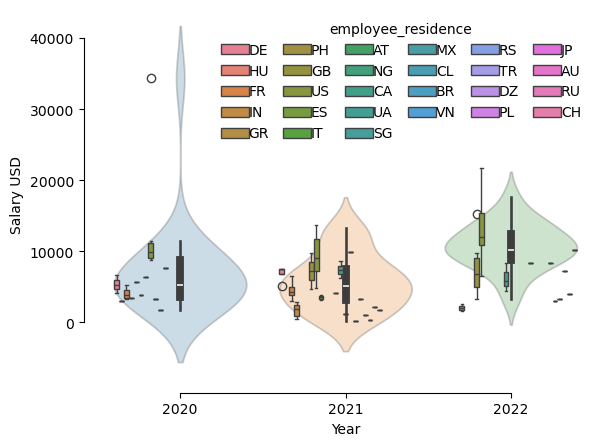

In [7]:
import seaborn as sns
yrs=pd.read_sql_query("select work_year from ds_salaries where job_title like 'Data Scientist'",con)
AllDS=pd.read_sql_query("select * from ds_salaries where job_title like 'Data Scientist'",con)
AllCs=AllDS.columns
Years=pd.unique(yrs['work_year'])
bxs=pd.DataFrame()
for y,yr in enumerate(Years):
    bxyr=pd.read_sql_query(f"select salary_in_usd from ds_salaries where job_title like 'Data Scientist' and work_year = {yr} ",con)
    bxs.loc[0:len(bxyr['salary_in_usd']),f'{yr}']=bxyr.loc[:,'salary_in_usd']/12
boxes=pd.DataFrame(bxs)

# Plot the orbital period with horizontal boxes
#sns.boxplot(data=boxes)

# Add in points to show each observation

import operator
places=[2,8,9]
getter=operator.itemgetter(*places)
cols=list(getter(AllCs))

dbsns=AllDS[cols]

fig,axes=plt.subplots();
#sns.swarmplot(data=dbsns,x=dbsns['work_year'],y=dbsns['salary_in_usd'],hue='employee_residence')
ax=sns.violinplot(data=bxs)
for violin, alpha in zip(ax.collections[::1], [0.8,0.6,0.4,0.2]):
    violin.set_alpha(.25)
#axes.plot(mng,color='k',)
sns.boxplot(data=dbsns,x=dbsns['work_year'],y=dbsns['salary_in_usd']/12,hue='employee_residence')
#sns.swarmplot(data=boxes)
sns.despine(offset=10, trim=True)
plt.ylabel('Salary USD')
plt.xlabel('Year');
# Improve the legend
sns.move_legend(
    axes, loc="upper right", ncol=6, frameon=False, columnspacing=1, handletextpad=0,
)
#Boxes=pd.DataFrame.groupby(by=TempDS['work_year'])
#TempDS.boxplot(column=Boxes,by=TempDS['salary_in_usd'])

## Chronologically, Data Scientists earned:

In [8]:
DSt=bxs.describe()
samples=DSt[DSt.columns].loc['count']
means=DSt[DSt.columns].loc['mean']
DSt

,2020,2021,2022
count,21.000000,21.000000,21.000000
mean,7164.210317,5680.119048,10687.309524
std,6786.387393,3936.512508,3295.198118
min,1805.750000,238.250000,3271.916667
25%,3516.416667,3152.083333,8725.166667
50%,5227.166667,5122.250000,10250.000000
75%,8750.000000,7561.166667,12500.000000
max,34333.333333,13333.333333,17625.000000


## But, is it different?

In [9]:
from scipy.stats import f_oneway
f, p = f_oneway(bxs['2020'],bxs['2021'],bxs['2022'])
print(f"A comparison between the analyzed periods with ANOVA says it {'is significant' if p<0.05 else 'is not significant'}, with p= {round(p,4)}")

A comparison between the analyzed periods with ANOVA says it is significant, with p= 0.0052


# And, well said, "practice makes the master'.

In [10]:
JupyterLite=False
if JupyterLite==True:
    %sql alter table salary_prediction_updated_datas rename 'Job Role' to Job;
    %sql alter table salary_prediction_updated_datas rename 'Education Level' to Education;
    %sql update salary_prediction_updated_datas set salary = salary/12;
else:
    %sql SELECT * FROM PRAGMA_TABLE_INFO('salary_prediction_updated_datas')

 * sqlite:///KaggleHF_DS.db
Done.
 * sqlite:///KaggleHF_DS.db
Done.
 * sqlite:///KaggleHF_DS.db
100000 rows affected.


## As of 2024, Data scientists come from different degrees:

In [11]:
careers=pd.read_sql_query("select Distinct education from salary_prediction_updated_datas",con)
levs=[]
for carre in careers['Education']:
    vs=pd.read_sql_query(f"select * from salary_prediction_updated_datas where Education like '%{carre[0:3]}%' AND Job = 'Data Scientist' limit 1",con)
    print()
    levs.append({"Years of Experience":vs.loc[0,"YearsExperience"],"Degree":vs.loc[0,"Education"],"Job Title":vs.loc[0,"Job"],"Average month salary":round(vs.loc[0,"Salary"],2)})
T=pd.DataFrame(levs)
print(T)






   Years of Experience            Degree       Job Title  Average month salary
0                12.17               PhD  Data Scientist               5517.32
1                10.85        Bachelor's  Data Scientist               5412.88
2                24.04          Master's  Data Scientist               9775.08
3                37.96       High School  Data Scientist              13527.06
4                31.41  Associate Degree  Data Scientist              11628.92


In [12]:
# We need to extract the data from the table. 
# One way to do wo is by extracting the queries from the tables as shown below
import re
phds=pd.read_sql_query("select * from salary_prediction_updated_datas where Education like 'PhD' AND Job = 'Data Scientist'",con);
bach=pd.read_sql_query("select * from salary_prediction_updated_datas where Education like '%Bachelor%' AND Job LIKE \'%Data%\'",con);
mast=pd.read_sql_query("select * from salary_prediction_updated_datas where Education like '%Master%' AND Job LIKE '%Data%'",con);
allDS=pd.read_sql_query("select * from salary_prediction_updated_datas where Job = 'Data Scientist'",con);
allDS2=cursor.execute("select * from salary_prediction_updated_datas where Job LIKE '%Data%'")
allDS2=pd.DataFrame(cursor.fetchall())
allDS2.rename(columns={0:"Index",1:"YearsExperience",2:"Education Level",3:"Job Role",4:"Salary"});
DSs=df[df['Job Role']=="Data Scientist"]
DSs.loc[:,'Salary']=DSs.loc[:,'Salary']/12
Baches=DSs[DSs['Education Level']=="Bachelor's"]
Masters=DSs[DSs['Education Level']=="Master's"]
Docs=DSs[DSs['Education Level']=="PhD"]

## Data scientists' income increases [linearly](https://www.geeksforgeeks.org/linear-regression-python-implementation/) with experience

In [13]:
#import libraries
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import scipy
print('Libs uploaded')

Libs uploaded


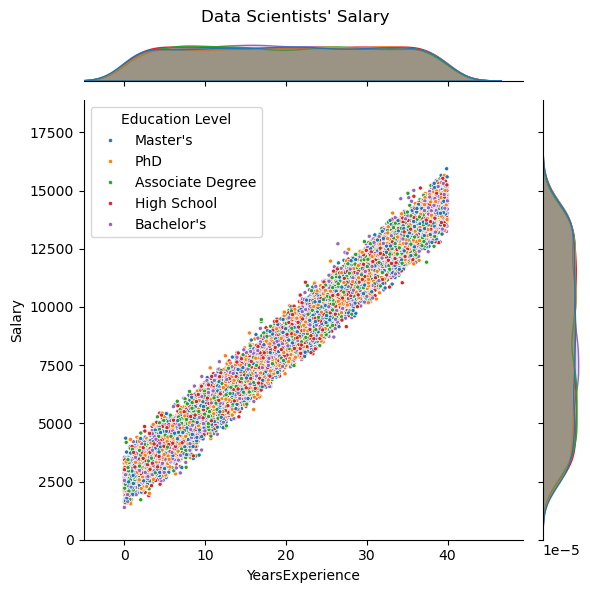

In [14]:
#Plotted the Salary vs the years of experience

#Create a joint plot
dtpt=DSs
fig= plt.figure
j=sb.jointplot(data=dtpt,x='YearsExperience',y='Salary',ratio=8,hue='Education Level',marker='.',marginal_ticks=False)
plt.xlim(-5,)
plt.ylim(0,)
x=np.array(dtpt['YearsExperience'])
y=np.array(dtpt['Salary'])
X=x[np.isnan(x)==False]
Y=y[np.isnan(y)==False]
minl=min([len(X),len(Y)])
X=X[0:minl]
Y=Y[0:minl]
# Obtained correlation coefficients for the data
corrs=scipy.stats.pearsonr(X,Y)
r,p=scipy.stats.pearsonr(X,Y)

# Obtained the  slope and intercept as a measur for initial salaries from (x,y)

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    return (b_0, b_1)

intercept,slope=estimate_coef(X,Y)
r,p=scipy.stats.pearsonr(X,Y)
#otro, = j.ax_joint.plot([], [], linestyle="", alpha=0)
#j.ax_joint.legend([otro],['y=mx+b; y={:3.2f}x+{:3.2f}, r={:.3}, p={:2.3e}'.format(b_1,b_0,r,p)])
#j.ax_joint.legend([otro],['r={:.3}, p={:.3e}'.format(b_1,b_0,r,p)])
plt.suptitle('Data Scientists\' Salary');
plt.tight_layout()

In [15]:
print(['Linear regression: y=mx+b; y={:3.2f}x+{:3.2f}, r={:.3}, p={:.4e}'.format(intercept,slope,r,p)])

['Linear regression: y=mx+b; y=2503.50x+299.87, r=0.99, p=0.0000e+00']


## And they come from different backgrounds:

In [16]:
numofClasses=pd.read_sql_query("select Education, count(*) as freq from salary_prediction_updated_datas where Job = 'Data Scientist' group by Education",con);
numofClasses

,Education,freq
0,Associate Degree,3989
1,Bachelor's,4074
2,High School,4083
3,Master's,4012
4,PhD,3969


## But everyone has the same chance.

In [17]:
TablaDeg=[]
for degree in numofClasses['Education']:
    base=DSs[DSs['Education Level']==degree]

    x=np.array(base['YearsExperience'])
    y=np.array(base['Salary'])
    X=x[np.isnan(x)==False]
    Y=y[np.isnan(y)==False]
    minl=min([len(X),len(Y)])
    X=X[0:minl]
    Y=Y[0:minl]

    
    r,p=scipy.stats.pearsonr(X,Y)
    intercept,slope=estimate_coef(X,Y)
    TablaDeg.append({"Degree":degree,"n=":x.shape[0],"Raise":slope,"Initial":intercept,"R\N{superscript two}":r,"P-value":round(p,4)})
Tabla=pd.DataFrame(TablaDeg)        
  

             Degree    n=       Raise      Initial        R²  P-value
0  Associate Degree  3989  299.225118  2523.878898  0.989961      0.0
1        Bachelor's  4074  299.434688  2514.954747  0.989211      0.0
2       High School  4083  299.968767  2500.494866  0.989780      0.0
3          Master's  4012  300.334733  2488.717294  0.989846      0.0
4               PhD  3969  300.410188  2489.167711  0.990213      0.0


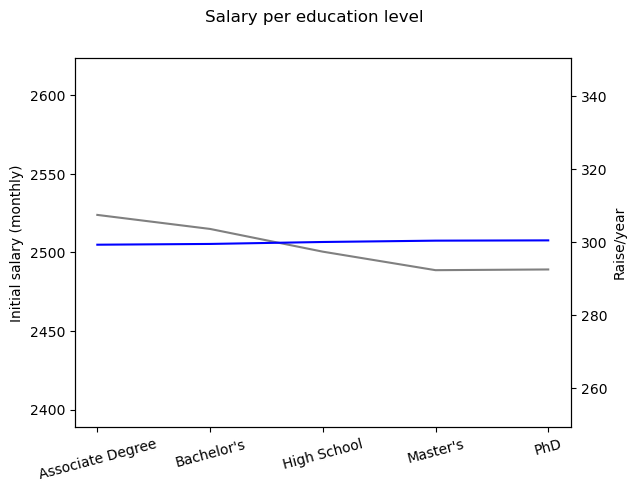

In [18]:
print(Tabla)
fig, ax=plt.subplots()
ini=ax.plot(Tabla['Degree'],Tabla['Initial'], color='gray',label='Initial')#,
plt.ylim([min(Tabla['Initial'])-100, max(Tabla['Initial'])+100])
plt.ylabel('Initial salary (monthly)');
plt.xticks(rotation=15);
slp=plt.twinx()
rs=slp.plot(Tabla['Degree'],Tabla['Raise'],color='Blue',label='Raise')
plt.ylim([min(Tabla['Raise'])-50, max(Tabla['Raise'])+50])
fig.suptitle('Salary per education level');
plt.ylabel('Raise/year');
con.close()
#plt.legend([ini,rs],['Initial','Raise'])

## Take-home message

* From 2020, Data Scientists have been better paid year after year
    * How would it be related to different sector in the actual highly-advanced technological world?
* The education level at which data scientists start their career is not as important as one might think.
    * Everyone starts at the same point.
        *  Some of them earn ~$30 less than the others at the beginning.
        *  And they increase their salary at the same rate.

In [19]:
Pretty_Jupyter_installed=False
if Pretty_Jupyter_installed == True:
    try:
        !jupyter nbconvert dsp001_DS_Sal.ipynb --to html --template pj
    except Exception as e:
        print('HTML not stored')

[NbConvertApp] Converting notebook dsp001_DS_Sal.ipynb to html
[NbConvertApp] Writing 5744909 bytes to dsp001_DS_Sal.html
